## Boolean modelling of a transcriptional oscillator

Orlando DA, Lin CY, Bernard A, Wang JY, Socolar JE, Iversen ES, Hartemink AJ, Haase SB. Global control of cell-cycle transcription by coupled CDK and network oscillators. Nature. 2008 Jun 12;453(7197):944-7. doi: 10.1038/nature06955. Epub 2008 May 7. PubMed PMID: 18463633; PubMed Central PMCID: PMC2736871.



## The Transcriptional Network Model of Orlando et al.

![orlando-etal-network.png](./orlando-etal-network.png)
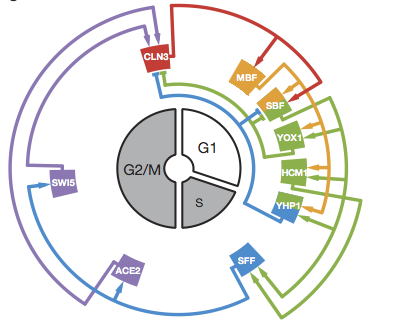

## Boolean Functions used by Orlando et al.

Below is the set of Boolean updatings function that Orlando et al. used.

Note the following symbols are used for Boolean operations:

* $\land$ = AND
* $\lor$ = OR
* $\lnot$ = NOT


![orlando-etal-boolfxns.png](./orland-etal-boolfxns.png)

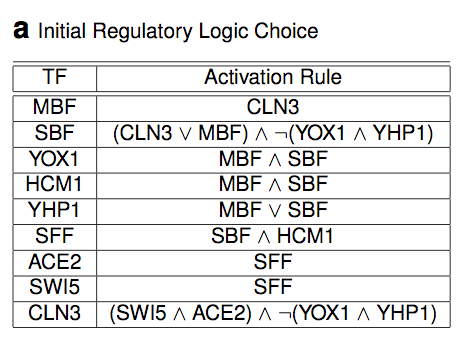

## Implement the Boolean Network Model of Orlando et al.

In [ ]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
## Based on the table above, define the functions in this code block

def fMBF(cln3):
    return # replace this code

def fSBF(cln3, mbf, yox1, yhp1):
    return # replace this code

def fHCM1(mbf, sbf):
    return # replace this code
    
def fYHP1(mbf, sbf):
    return # replace this code
    
def fSFF(sbf, hcm1):
    return # replace this code
    
def fCLN3(swi5, ace2, yox1, yhp1):
    return # replace this code

def fSWI5(sff):
    return # replace this code

def fACE2(sff):
    return # replace this code

def fYOX1(mbf, sbf):
    return # replace this code


## Pre-defined functions

In [ ]:
def plot_simulation(simulation_df):
    """2D simulation data frame -> figure
    """
    names = simulation_df.index
    plt.imshow(simulation_df, interpolation='none', cmap='copper')
    plt.xlabel('Time units')
    plt.yticks(range(len(names)), names)

## Run an instance of the simulation

If the functions were properly defined above the following code will run the simulation for the given starting conditions.


In [ ]:
MBF = [1]
SBF = [1]
YOX1 = [0]
HCM1 = [0]
YHP1 = [0]
SFF = [0]
ACE2 = [0]
SWI5 = [0]
CLN3 = [0]

nodes = MBF, SBF, YOX1, HCM1, YHP1, SFF, ACE2, SWI5, CLN3
names = ['MBF', 'SBF', 'YOX1', 'HCM1', 'YHP1', 'SFF', 'ACE2', 'SWI5', 'CLN3']

nsteps = 20
for i in range(nsteps):
    mbf, sbf, yox1, hcm1, yhp1, sff, ace2, swi5, cln3 = [i[-1] for i in nodes]
    
    MBF.append(  fMBF(cln3) )
    SBF.append(  fSBF(cln3, mbf, yox1, yhp1) )
    YOX1.append( fYOX1(mbf,sbf) )
    HCM1.append( fHCM1(mbf,sbf) )
    YHP1.append( fYHP1(mbf,sbf) )
    SFF.append(  fSFF(sbf, hcm1) )
    ACE2.append( fACE2(sff) )
    SWI5.append( fSWI5(sff) )
    CLN3.append( fCLN3(swi5,ace2,yox1,yhp1) )
    

simulation = pd.DataFrame(data = np.array(nodes), index = names)
plot_simulation(simulation)

pass

## In-class Problems

1.  Orlando et al. claim that the specified Boolean network model reproduces oscillatory behaviors similar to what was seen in their experimental data.  For the given starting conditions, did you observe oscillatory behavior? [1 pt]

1. Run the simulation with all nodes initially set to 1.  What behavior do you observe?  Is the "all on" state a fixed point attractor? [2 pts]

2. Run the simulation with all nodes initially set to 0.  What behavior do you observe? Is the "all off" state a fixed point attractor? [2 pts]

3. Try a variety of other starting conditions (~10-15 of these).  Roughly how often do you observe oscillatory behavior? [2 pts]




## A wrapper function for the simulation

It's convenient to wrap the core logic of the simulation into a wrapper function, as defined below.  The first argument to `cell_cycle` is a list of the initial values, corresponding to the genes in this order ` ['MBF', 'SBF', 'YOX1', 'HCM1', 'YHP1', 'SFF', 'ACE2', 'SWI5', 'CLN3']`

In [ ]:
def cell_cycle(initvals, nsteps=20):
    if len(initvals) != 9:
        raise Exception("Wrong number of initial values!")
    
    nodes = MBF, SBF, YOX1, HCM1, YHP1, SFF, ACE2, SWI5, CLN3 = [[i] for i in initvals]
    for i in range(nsteps):
        mbf, sbf, yox1, hcm1, yhp1, sff, ace2, swi5, cln3 = [i[-1] for i in nodes]
        MBF.append(  fMBF(cln3) )
        SBF.append(  fSBF(cln3, mbf, yox1, yhp1) )
        YOX1.append( fYOX1(mbf,sbf) )
        HCM1.append( fHCM1(mbf,sbf) )
        YHP1.append( fYHP1(mbf,sbf) )
        SFF.append(  fSFF(sbf, hcm1) )
        ACE2.append( fACE2(sff) )
        SWI5.append( fSWI5(sff) )
        CLN3.append( fCLN3(swi5,ace2,yox1,yhp1) )        
    
    simulation = pd.DataFrame(data = np.array(nodes), index = names)
    return simulation
    

In [ ]:
s1 = cell_cycle([1,1,0,0,0,0,0,0,0], nsteps=20)
plot_simulation(s1)

## Is the cell cycle TF network robust?

One of the claims that the authors make in the paper is that the network is "robust". Robustness as they use it means two things:

1. For a large fraction of initial conditions the network produces oscillatory behavior

2. Modest changes to the network structure (e.g. alternative hypotheses about the Boolean updating functions) usually result in qualitatively similar oscillatory behaviors.

We'll examine each of these claims.

As you saw above, the configuration "all off" (i.e. every nodes is zero) is a fixed point attractor (it turns out this is the only fixed point attractor for this particular model). The function `went_to_all_off` below takes as input a data frame representing the simulation output from `cell_cycle` (above) and checks to see if it includes a time point where all the nodes are in the off state.

In [ ]:
def went_to_all_off(simulation_df):
    """2D array representing simulation (genes in rows, time in cols) -> True/False
    
    Return True if at any time point in the array, all nodes are False (zero)
    """
    col_sums = np.sum(simulation_df, axis=0).tolist()  # sum over rows
    if 0 in col_sums:
        return True
    return False


Below I illustrate how one might apply the `went_to_all_off` function in combination with random initial conditions.  Evaluate the following cell multiple times to see how the output changes:

In [ ]:
randstarts = np.random.randint(2, size=9)  # generate array of random 0s and 1s, of length 9
s = cell_cycle(randstarts)
plot_simulation(s)
print("Went to all zeros?", went_to_all_off(s))


## Generating all possible starting conditions

The Boolean network under consideration as 9 nodes, so there are $2^9 = 512$ possible starting conditions.  This is a relatively small state space, so we should be able to exhaustively evaluate each of these starting conditions to see which ones lead to the "all off" fixed state.

The Python module `itertools` defines a function called `product` (see Python docs on [itertools](https://docs.python.org/3/library/itertools.html#itertools.product)) which we can use to generate all possible combinations of 0s and 1s of a given length:

In [ ]:
from itertools import product
p = product([0,1], repeat=9)  # product returns a "generator"
                              # so for ease of showing you the output I'm
                              # wrapping the results in a list
p = list(p)

In [ ]:
p[:10]  # first 10 combinations

In [ ]:
p[-10:]  # last 10 combinations

In [ ]:
len(p)  # total number of combinations

## In-class Problem

Use the `product`, `cell_cycle`, and `went_to_all_off` functions to calculate what fraction of initial conditions produce oscillatory dynamics for the Boolean network model of Orlando et al. [5 pts]